In [9]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.font_manager as fm
import matplotlib.patheffects as path_effects
from scipy.sparse import linalg

In [3]:
# (2)
N=100

ellipse=np.zeros((N+1,2))
for i in range(N+1):
    theta=( -1 * np.pi )/ 4 + (( 11 * np.pi ) / ( 12 * N ) * i)
    ellipse[i][0]=200*np.cos(theta)
    ellipse[i][1]=150*np.sin(theta)

In [4]:
ellipse

array([[ 141.42135624, -106.06601718],
       [ 145.43479824, -102.96797899],
       [ 149.32763646,  -99.7845532 ],
       [ 153.0966427 ,  -96.51837971],
       [ 156.73869147,  -93.17216704],
       [ 160.25076254,  -89.74869009],
       [ 163.62994349,  -86.25078781],
       [ 166.87343207,  -82.68136089],
       [ 169.9785386 ,  -79.04336932],
       [ 172.9426881 ,  -75.33982997],
       [ 175.76342253,  -71.57381404],
       [ 178.43840275,  -67.74844455],
       [ 180.96541049,  -63.86689373],
       [ 183.34235021,  -59.93238043],
       [ 185.56725078,  -55.94816739],
       [ 187.63826718,  -51.91755856],
       [ 189.553682  ,  -47.84389639],
       [ 191.31190685,  -43.73055903],
       [ 192.91148369,  -39.58095749],
       [ 194.35108606,  -35.39853292],
       [ 195.62952015,  -31.18675362],
       [ 196.74572579,  -26.94911229],
       [ 197.69877736,  -22.68912304],
       [ 198.48788453,  -18.41031852],
       [ 199.11239292,  -14.116247  ],
       [ 199.57178465,   

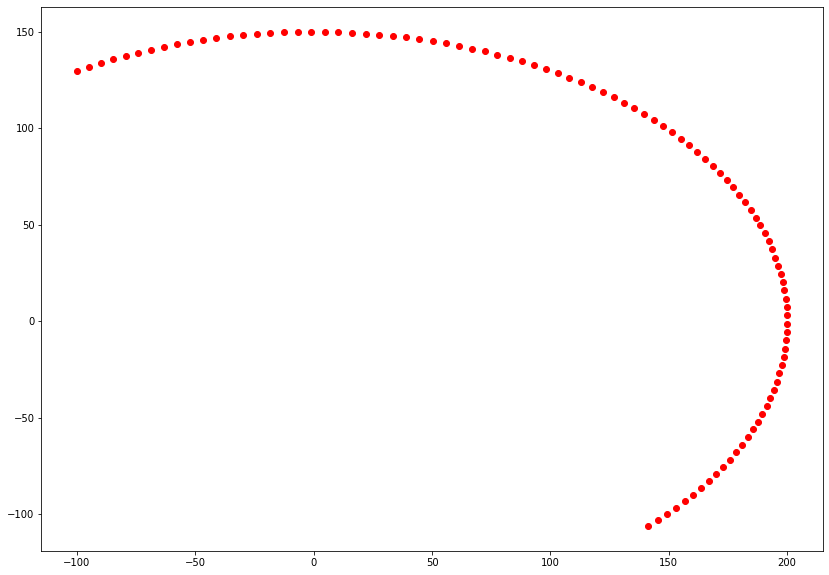

In [5]:
plt.figure(figsize=(14, 10))
plt.plot(ellipse[:, 0], ellipse[:, 1], color="red", linestyle="None", marker='o')

In [10]:
# (3)
sample=np.zeros((N+1,2))
for i in range(N+1):
    sample[i][0]=ellipse[i][0]+random.gauss(0,sigma=2.0)
    sample[i][1]=ellipse[i][1]+random.gauss(0,sigma=2.0)

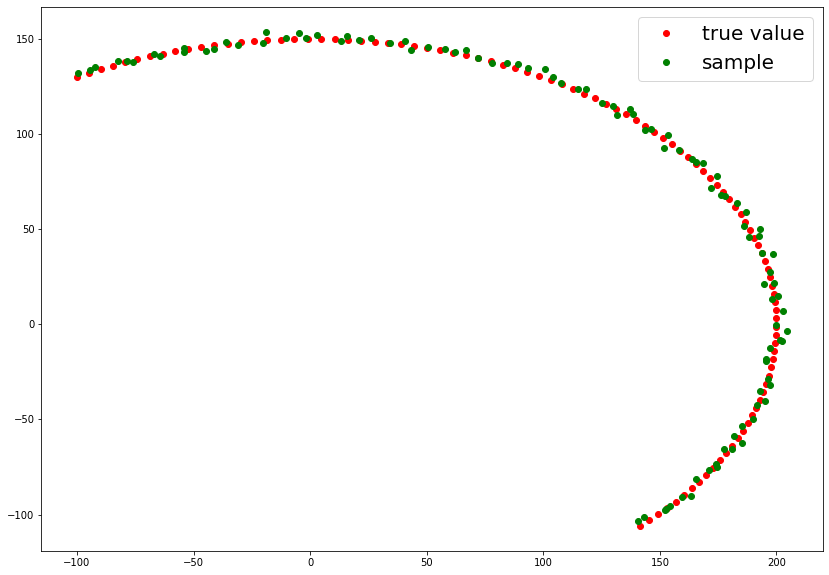

In [11]:
plt.figure(figsize=(14, 10))
plt.plot(ellipse[:, 0], ellipse[:, 1], color="red", linestyle="None", marker='o')
plt.plot(sample[:, 0], sample[:, 1], color="green", linestyle="None", marker='o')
plt.legend(["true value","sample"],loc="best",fontsize=20)

In [63]:
# (4)
sigma_num=20
generate_num=1000
N=100

# sigmaの値を変化させた1000個ずつのデータの生成
sample=np.zeros((sigma_num,generate_num,N+1,2))
for i in range(sigma_num):
    sigma=0.1+(i*0.1)
    for j in range(generate_num):
        for k in range(N+1):
            sample[i][j][k][0]=ellipse[i][0]+random.gauss(0,sigma=sigma)
            sample[i][j][k][1]=ellipse[i][1]+random.gauss(0,sigma=sigma)


In [128]:
#真の楕円のパラメータ
u_bar=np.array([2.5*(10**(-5)),4.4*(10**(-5)),0,0,0,-1])

In [100]:
def M(coordinate):
    matrix=np.zeros([6,6])
    for i in range(N+1):
        x=coordinate[i][0]
        y=coordinate[i][1]
        x_alpha=np.array([x*x,2*x*y,y*y,2*x,2*y,1])
        matrix+=x_alpha*x_alpha.T
    return matrix

In [101]:
def eig_inverse_power(A, eps=1e-15, maxiter=100):
    x = np.ones((A.shape[0], 1))
    x = x/np.linalg.norm(x)

    v0 = np.zeros((A.shape[0], 1))
    v = x

    i = 0
    while np.linalg.norm(v - v0) > eps:
        v0 = v
        v = np.linalg.solve(A, x)
        l = v.T.dot(x)[0, 0]
        x = v/np.linalg.norm(v)

        i += 1
        if i == maxiter:
            break

    x[np.abs(x) < eps] = 0.

    return 1./l, x

In [102]:
def normalize_eigenvector(vector):
    vector = vector/np.linalg.norm(vector)
    return vector

def normalize_eigenvectors(vector):
    n = vector.shape[1]
    for j in range(n):
        vector[:, j] = normalize_eigenvector(vector[:, j])
    return vector

In [124]:
# 楕円のパラメータ(真値)を計算
from scipy.sparse.linalg import eigs
U=np.zeros([sigma_num,generate_num,6])
for i in range(sigma_num):
    for j in range(generate_num):
        m=M(sample[i][j])#行列Mの計算
        value,vector=eigs(m,1,which ="SM") #行列Mに対する最小固有値とそれに対応する固有ベクトル
        vector=normalize_eigenvectors(vector) #ベクトルを正規化
        print("vector: ",vector.reshape([6]))
        U[i][j]=U[i][j]+vector.reshape([6])
        

vector:  [ 0.60388195+0.j -0.2958568 +0.j  0.19501697+0.j  0.59907291+0.j
  0.25907111+0.j  0.28940892+0.j]
vector:  [-0.19467974+0.j  0.01241043+0.j  0.52783199+0.j -0.5301585 +0.j
 -0.63402422+0.j  0.01686467+0.j]
vector:  [-0.55996567+0.j  0.23684809+0.j  0.08559481+0.j -0.19586929+0.j
 -0.75000908+0.j -0.14878358+0.j]
vector:  [-0.42092787+0.j  0.21601258+0.j -0.20557074+0.j -0.54476913+0.j
 -0.2919022 +0.j -0.59322733+0.j]
vector:  [ 0.12237308+0.j -0.0636346 +0.j  0.06503759+0.j  0.70621667+0.j
  0.67630722+0.j  0.14356931+0.j]
vector:  [ 0.10013107+0.j -0.13311874+0.j  0.62974493+0.j  0.38130594+0.j
  0.63206878+0.j -0.17541189+0.j]
vector:  [-0.40315648+0.j  0.09055195+0.j  0.63014483+0.j  0.60677728+0.j
 -0.1699934 +0.j  0.18736665+0.j]
vector:  [-0.80161104+0.j  0.37595534+0.j -0.14090922+0.j  0.02346775+0.j
  0.44115531+0.j -0.03245261+0.j]
vector:  [ 0.56737526+0.j -0.25697637+0.j  0.03351409+0.j  0.38634707+0.j
  0.30734427+0.j  0.60597088+0.j]
vector:  [ 0.42100259+0.j -0

/var/folders/5q/gwhjzy5s4nl5rhb5x_hsv9z40000gn/T/ipykernel_30538/1335280651.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  U[i][j]=U[i][j]+vector.reshape([6])


vector:  [ 0.16472556+0.j  0.01648029+0.j -0.6375443 +0.j  0.51230021+0.j
 -0.45366402+0.j  0.31283958+0.j]
vector:  [ 0.47692706+0.j -0.15293467+0.j -0.41954345+0.j -0.45531493+0.j
 -0.45030614+0.j -0.40379147+0.j]
vector:  [-0.08170251+0.j  0.1135924 +0.j -0.54949992+0.j -0.30750253+0.j
  0.08067253+0.j -0.75987199+0.j]
vector:  [-0.18706092+0.j  0.0862193 +0.j -0.02244227+0.j  0.64203978+0.j
  0.20996273+0.j  0.707652  +0.j]
vector:  [-0.51673857+0.j  0.16977665+0.j  0.42669697+0.j -0.54336494+0.j
 -0.41688187+0.j  0.2303278 +0.j]
vector:  [ 0.38752994+0.j -0.22022937+0.j  0.34194673+0.j -0.69583293+0.j
 -0.42540618+0.j -0.13870157+0.j]
vector:  [-0.22710889+0.j  0.10222415+0.j -0.00956731+0.j  0.09258887+0.j
  0.77925221+0.j  0.56751523+0.j]
vector:  [ 0.36792219+0.j -0.22388168+0.j  0.42952346+0.j -0.16727127+0.j
 -0.39940717+0.j  0.66521732+0.j]
vector:  [ 0.33924502+0.j -0.10639744+0.j -0.31454316+0.j -0.32591791+0.j
 -0.76196515+0.j  0.29638089+0.j]
vector:  [-0.50137558+0.j  0

array([-0.35935756,  0.23810762, -0.55775925,  0.46713175, -0.07261223,
       -0.52875979])